In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the data
data = pd.read_csv('/content/LeakagePower.csv', delimiter=',')

# Remove 'u' character from the values in the DataFrame
data = data.applymap(lambda x: float(x[:-1]) if isinstance(x, str) and x.endswith('u') else x)

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=35)
model.fit(X, y)

# Now you can use this model to predict leakage power for new data
# For example, if you want to predict leakage power for MemCellType=1, numRowSubArray/numColSubArray=64, and Layer=10
new_data = pd.DataFrame({
    'MemCellType': [1],
    'numRowSubArray/numColSubArray': [512]
})
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy*100}%")
# Predicting leakage power for new data
predicted_leakage_power = model.predict(new_data)
print("Predicted Leakage Power:", predicted_leakage_power)


Training Accuracy: 90.39489262326266%
Predicted Leakage Power: [[  2.6838951   5.3677922  78.047038    5.3677922  77.749623    5.3677922
   77.467631    5.3677922 169.19989     5.3677922 175.79308     5.3677922
  181.70578     5.3677922   4.6690805  32.400536    4.5863598  65.004583
    4.5036359  64.902964    4.4209152  64.801335    4.3381979  64.70148
    4.255479   64.601681    4.0827493   6.1843077  79.691025    6.1635579
   79.672049    6.1429484  79.65301     6.1221916  79.634027    6.1015877
   79.616801    6.0808323 119.49245     8.0177327]]


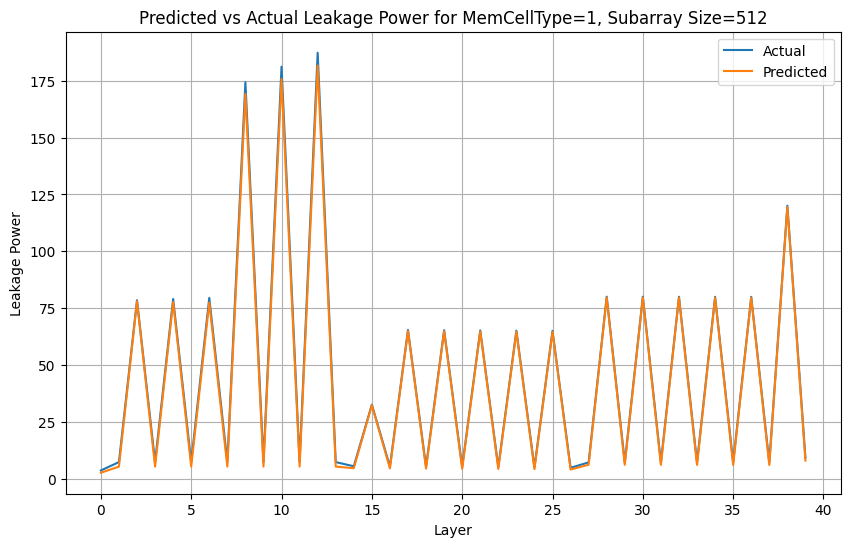

In [17]:
import matplotlib.pyplot as plt

# Choose MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 512

# Filter the training data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data = data[(data['MemCellType'] == mem_cell_type) & (data['numRowSubArray/numColSubArray'] == subarray_size)]

# Extract the actual LeakagePower values
actual_values = filtered_data.iloc[:, 2:]

# Plot the predicted LeakagePower and the actual LeakagePower values
plt.figure(figsize=(10, 6))
plt.plot(actual_values.values[0], label='Actual')
plt.plot(predicted_leakage_power[0], label='Predicted')
plt.xlabel('Layer')
plt.ylabel('Leakage Power')
plt.title(f'Predicted vs Actual Leakage Power for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
plt.legend()
plt.grid(True)
plt.show()


Training Accuracy: 0.8482442486165365


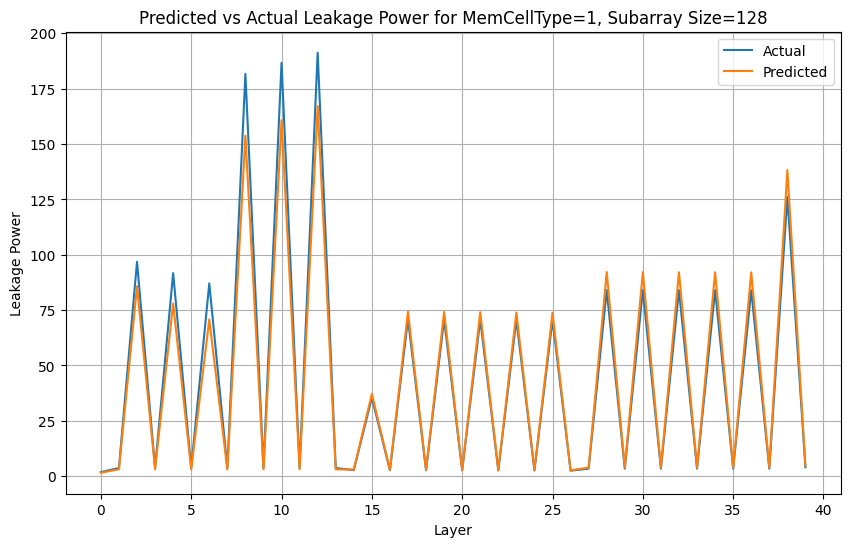

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/LeakagePower.csv', delimiter=',')

# Remove 'u' character from the values in the DataFrame
data = data.applymap(lambda x: float(x[:-1]) if isinstance(x, str) and x.endswith('u') else x)

# Separate features (X) and target variable (y)
X = data.iloc[:, :2]  # First two columns: MemCellType and numRowSubArray/numColSubArray
y = data.iloc[:, 2:]  # Columns from position 2 onwards: Layer1, Layer2, ...

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = RandomForestRegressor(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

# Predicting LeakagePower for the testing data
predicted_leakage_power_test = model.predict(X_test)

# Plot a graph comparing the predicted and actual LeakagePower values for a specific MemCellType and numRowSubArray/numColSubArray
mem_cell_type = 1
subarray_size = 128
training_accuracy = model.score(X, y)
print(f"Training Accuracy: {training_accuracy}")

# Filter the testing data for the chosen MemCellType and numRowSubArray/numColSubArray
filtered_data_test = X_test[(X_test['MemCellType'] == mem_cell_type) & (X_test['numRowSubArray/numColSubArray'] == subarray_size)]

if not filtered_data_test.empty:
    index_test = filtered_data_test.index[0]

    # Extract the actual LeakagePower values for the chosen MemCellType and numRowSubArray/numColSubArray
    actual_values_test = y_test.iloc[index_test]

    # Plot the predicted and actual LeakagePower values
    plt.figure(figsize=(10, 6))
    plt.plot(actual_values_test.values, label='Actual')
    plt.plot(predicted_leakage_power_test[index_test], label='Predicted')
    plt.xlabel('Layer')
    plt.ylabel('Leakage Power')
    plt.title(f'Predicted vs Actual Leakage Power for MemCellType={mem_cell_type}, Subarray Size={subarray_size}')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified MemCellType and Subarray Size.")
